# Introducation
by Wai An Tse

This is the Capstone Project for my study of Google Data Analystics Course. Unlike its suggested language , R, I used python to complete my project.

In this case study, The analysis work for a fictional company, Cyclistic, will be performed in order to answer the key business questions.
The following steps of the data analysis process will be performed:

* Ask
* Prepare
* Process
* Analyze
* Share
* Act

The following notebook is the approach to analyzing data following the outlined steps above after reviewing various other notebooks. 
The data used in this case study is sourced from Motivate International Inc under this agreement.

# Ask

## Situation
## About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

## Questions
The goal of the marketing team is to design marketing strategies aimed at converting casual riders into annual members. My task is to answer 1 of 3 questions that will guide the future marketing program –

1. How do annual members and casual riders use Cyclistic bikes differently?

1. Why would casual riders buy Cyclistic annual memberships?

1. How can Cyclistic use digital media to influence casual riders to become members?

# Prepare
In order to preform the data, the following steps is performed.

* Import library for data process and analyze
* Read the data files and combine them into one file

### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt



### Read and combine all the csv files into one datafile

In [2]:
data_01 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202201-divvy-tripdata/202201-divvy-tripdata.csv')
data_02 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202202-divvy-tripdata/202202-divvy-tripdata.csv')
data_03 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202203-divvy-tripdata/202203-divvy-tripdata.csv')
data_04 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202204-divvy-tripdata/202204-divvy-tripdata.csv')
data_05 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202205-divvy-tripdata/202205-divvy-tripdata.csv')
data_06 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202206-divvy-tripdata/202206-divvy-tripdata.csv')
data_07 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202207-divvy-tripdata/202207-divvy-tripdata.csv')
data_08 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202208-divvy-tripdata/202208-divvy-tripdata.csv')
data_09 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202209-divvy-tripdata/202209-divvy-publictripdata.csv')
data_10 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202210-divvy-tripdata/202210-divvy-tripdata.csv')
data_11 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202211-divvy-tripdata/202211-divvy-tripdata.csv')
data_12 = pd.read_csv('/kaggle/input/divvytripdata-2022-dataset/202212-divvy-tripdata/202212-divvy-tripdata.csv')

all_trip = pd.concat([data_01, data_02, data_03, data_04, data_05, data_06, data_07, data_08, data_09, data_10, data_11, data_12])

all_trip.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


Check the data types and and missing data.

In [3]:
all_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


# Process

1. Remove columns that is not used in this analyst
1. Convent start time and end time as datatime objects
1. Calculate the ride time in minutes
1. Convent the weekday for analysis
1. Convent the starting time for analysis
1. Remove data for very short ride time (less than 3 minutes)
1. Have basic views of the data info

In [4]:
all_trip_trimmed = all_trip.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'])
all_trip_trimmed['started_at'] = pd.to_datetime(all_trip_trimmed['started_at'])
all_trip_trimmed['ended_at'] = pd.to_datetime(all_trip_trimmed['ended_at'])
all_trip_trimmed['ride_length'] = (all_trip_trimmed['ended_at']-all_trip_trimmed['started_at']).dt.seconds
all_trip_trimmed['weekday'] = all_trip_trimmed['started_at'].dt.day_name()
all_trip_trimmed['hour'] = all_trip_trimmed['started_at'].dt.hour
all_trip_trimmed = all_trip_trimmed[all_trip_trimmed['ride_length']>= 180]
all_trip_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231460 entries, 1 to 181805
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
 9   ride_length         int64         
 10  weekday             object        
 11  hour                int64         
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 518.9+ MB


# Analyze


### Question 1. How do annual members and casual riders use Cyclistic bikes differently?
### Comparation 1: Ratio of ride of both types of riders.

[Text(0.5, 1.0, 'Number of rides of both types of riders')]

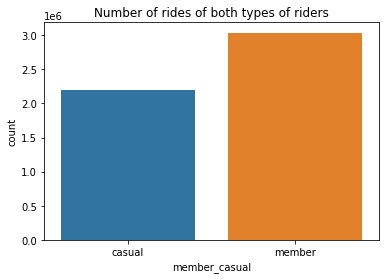

In [7]:
sns.countplot(data=all_trip_trimmed, x='member_casual').set(title='Number of rides of both types of riders')

The plot shows that there are more rides by member riders then casual riders. The ratio between them is around 3:2.

### Comparation 2: Average ride length for both types of riders.

[Text(0.5, 1.0, 'Difference of the average ride length of both type of riders')]

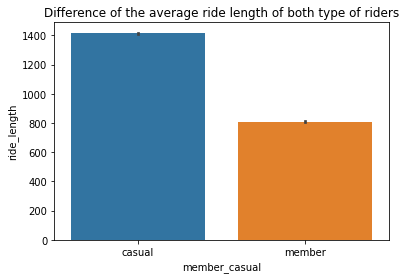

In [8]:
sns.barplot(data=all_trip_trimmed, x='member_casual', y='ride_length').set(title="Difference of the average ride length of both type of riders")

The plot shows that casual riders have longer average ride time than member riders.

### Comparation 3: Difference of the usage weekdays of both typs of riders.

[Text(0.5, 1.0, 'Difference of the usage weekdays of both typs of riders')]

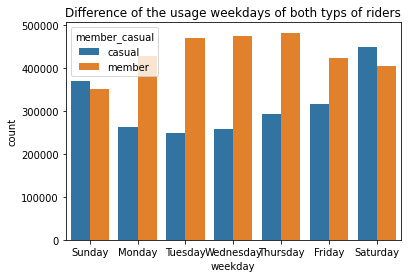

In [11]:
sns.countplot(data=all_trip_trimmed, x='weekday', hue='member_casual',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], dodge=True).set(title="Difference of the usage weekdays of both typs of riders")

The plot shows that more casual use the bikes on Weekends (Sunday and Saturday) while more memebers use the bikes on Weekdays (Monday to Friday).

### Comparation 4: Difference of the starting hours of both riders.

[Text(0.5, 1.0, 'Difference of the starting hours of both riders.')]

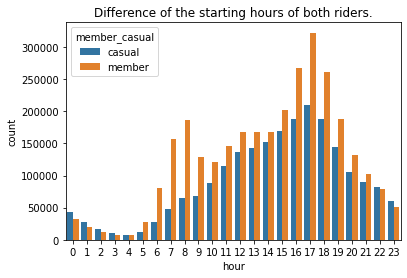

In [12]:
sns.countplot(data=all_trip_trimmed, x='hour', hue='member_casual', dodge=True).set(title="Difference of the starting hours of both riders.")

By compareing the start of using time for different groups. We can see more member use the services on hour 5-10) while casual user have more even time of using the service.

By comparing the plots above, we can see that 
* Member users have more short average rides on weekdays and working hours. They might use as commute purpose.
* Cascual users  might use the server as leisure prupose. They might be tourist or residents. 

## Other comparations

In [ ]:
sns.countplot(data=all_trip_trimmed, x='rideable_type', hue='member_casual', dodge=True).set(title='Type of bikes usage for both types of riders')

Both groups prefer classic bikes over electric bikes, but casual riders use electric bikes at a higher proportion in relation to classic bikes than annual members.

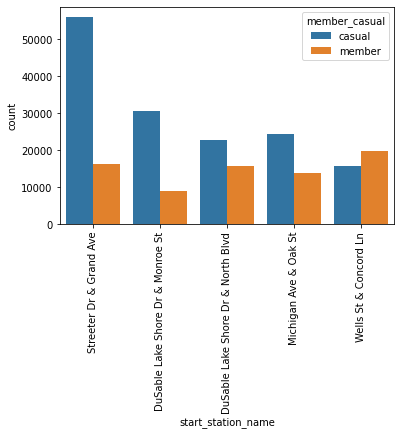

In [14]:
startcount = sns.countplot(data=all_trip_trimmed, x='start_station_name',hue='member_casual',order = all_trip_trimmed['start_station_name'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)  
plt.show(startcount)

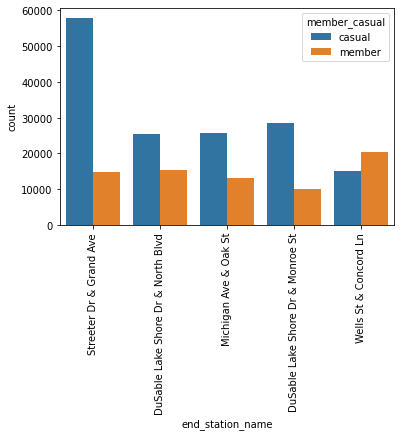

In [15]:
endcount = sns.countplot(data=all_trip_trimmed, x='end_station_name',hue='member_casual',order = all_trip_trimmed['end_station_name'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)  
plt.show(endcount)

Both member and cascual rider use the similar start and end station which might include popular spots in the city.

# Act
### How can Cyclistic use digital media to influence casual riders to become members?

* Cyclistic could offer a new subscription plan for the leisure user as allow them to use the bike in the weekend as a exercise purpose for the residents of the city.
* Cyclistic could also promote the advantage of using of electric bike as commute tool and encourage user have longer communte distance to use the bike as member.